# Análisis Cluster

### Docente: M.Sc. Richard Fernández 

In [5]:
import os as os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_samples, silhouette_score

In [6]:
print("Current Working Directory " , os.getcwd())

Current Working Directory  c:\Users\MSI\Documents\GitHub\Machine_Learning\Week 12


In [7]:
#os.chdir("D:/Bases/Otros")

In [8]:
print("Current Working Directory " , os.getcwd())

Current Working Directory  c:\Users\MSI\Documents\GitHub\Machine_Learning\Week 12


In [9]:
data = pd.read_csv("inv_mercados.csv", sep=',')

In [10]:
#Descripción de variables:
#ID: Código de identificación del entrevistado
#V1: Salir de compras es divertido.
#V2: Salir de compras afecta al presupuesto.
#V3: Combinar salir de compras con comida fuera de casa.
#V4: Salir de compras, para hacer las mejores compras.
#V5: No me importa salir de compras.
#V6: Se puede ahorrar mucho dinero si se comparan precios.

In [11]:
data.head()

,ID,V1,V2,V3,V4,V5,V6
0,1,6,4,7,3,2,3
1,2,2,3,1,4,5,4
2,3,7,2,6,4,1,3
3,4,4,6,4,5,3,6
4,5,1,3,2,2,6,4


In [12]:
data.dtypes

ID    int64
V1    int64
V2    int64
V3    int64
V4    int64
V5    int64
V6    int64
dtype: object

In [13]:
data_X = data.drop('ID', axis = 1)

In [14]:
data_X.head()

,V1,V2,V3,V4,V5,V6
0,6,4,7,3,2,3
1,2,3,1,4,5,4
2,7,2,6,4,1,3
3,4,6,4,5,3,6
4,1,3,2,2,6,4


In [15]:
data_X_scale = pd.DataFrame(StandardScaler().fit_transform(data_X))
data_X_scale.columns = ["V1","V2","V3","V4","V5","V6"]
data_X_scale.head()

,V1,V2,V3,V4,V5,V6
0,1.161314,-0.072739,1.554929,-0.743311,-0.844581,-0.925548
1,-0.999270,-0.800132,-1.503948,-0.067574,0.902828,-0.239957
2,1.701460,-1.527525,1.045116,-0.067574,-1.427050,-0.925548
3,0.081022,1.382047,0.025491,0.608164,-0.262111,1.131225
4,-1.539416,-0.800132,-0.994135,-1.419048,1.485297,-0.239957


In [16]:
kmeans = KMeans(n_clusters = 3).fit(data_X_scale)

c:\Users\MSI\anaconda3\envs\spacy\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MSI\anaconda3\envs\spacy\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
labels = pd.DataFrame(kmeans.predict(data_X_scale))
labels.columns = ['segmento']
labels.head()

,segmento
0,1
1,0
2,1
3,2
4,0


In [18]:
data_final = pd.concat([data,labels], axis = 1)
data_final.head()

,ID,V1,V2,V3,V4,V5,V6,segmento
0,1,6,4,7,3,2,3,1
1,2,2,3,1,4,5,4,0
2,3,7,2,6,4,1,3,1
3,4,4,6,4,5,3,6,2
4,5,1,3,2,2,6,4,0


In [19]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        20 non-null     int64
 1   V1        20 non-null     int64
 2   V2        20 non-null     int64
 3   V3        20 non-null     int64
 4   V4        20 non-null     int64
 5   V5        20 non-null     int64
 6   V6        20 non-null     int64
 7   segmento  20 non-null     int32
dtypes: int32(1), int64(7)
memory usage: 1.3 KB


In [20]:
data_final.groupby(['segmento'])[['V1','V2','V3','V4','V5','V6']].agg(['count','mean'])

V1              V2              V3              V4           V5  \
         count      mean count      mean count      mean count   mean count   
segmento                                                                      
0            6  1.666667     6  3.000000     6  1.833333     6  3.500     6   
1            8  5.750000     8  3.625000     8  6.000000     8  3.125     8   
2            6  3.500000     6  5.833333     6  3.333333     6  6.000     6   

                   V6            
           mean count      mean  
segmento                         
0         5.500     6  3.333333  
1         1.875     8  3.875000  
2         3.500     6  6.000000

In [21]:
#Perfilamiento de segmentos

#Grupo1 => Selectivos (2), Empedernidos (1), Desinteresados (0)
#Grupo2 => Infrecuente (0), Probable (1), Tacaño (2)
#Grupo3 => No Clientes (0), Compradores por Hobby (1), Compradores por necesidad (2)
#Grupo4 => Estándar (0), Gastadores (1), Ahorradores (2)
#Grupo5 => Detesta ir a comprar (0), Gusta (1), Balanceado (2)

#0 => V5 => Indiferentes
#1 => V1 y V3 => Divertidos
#2 => V2, V4 y V6 => Ahorradores

In [22]:
sample_silhouette_values = silhouette_samples(data_X, labels)
sample_silhouette_values

c:\Users\MSI\anaconda3\envs\spacy\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.61936515, 0.55116095, 0.55305902, 0.48546787, 0.59314503,
       0.57426923, 0.55305466, 0.57540659, 0.53538333, 0.51845135,
       0.63929909, 0.42312356, 0.39817884, 0.60553311, 0.39414773,
       0.57070211, 0.45077846, 0.1779728 , 0.53945679, 0.56363111])

In [23]:
silhouette_avg = silhouette_score(data_X, labels)
silhouette_avg

c:\Users\MSI\anaconda3\envs\spacy\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5160793381862094

In [24]:
pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------  276.5/282.6 kB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

c:\Users\MSI\anaconda3\envs\spacy\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MSI\anaconda3\envs\spacy\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MSI\anaconda3\envs\spacy\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MSI\anaconda3\envs\spacy\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is k

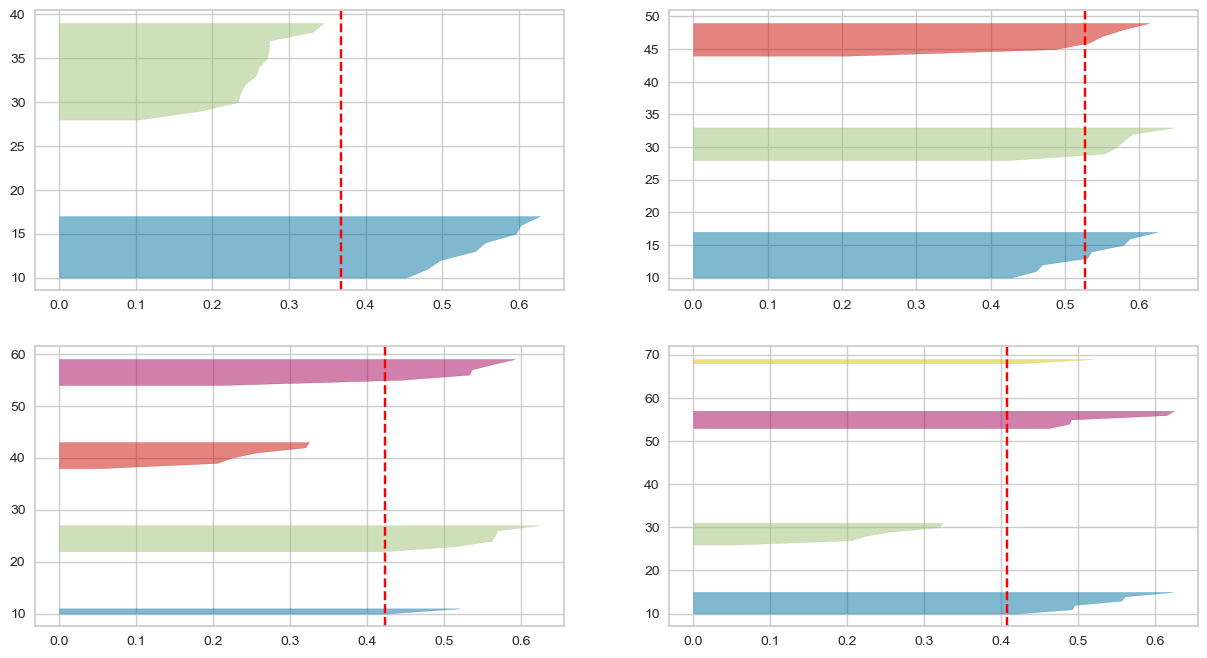

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_X_scale)

In [27]:
#La línea punteada roja representa el valor medio del Sillhouette score de todos los clusters 
#y es la medida que utilizamos para saber el número de clusters a utilizar.

In [28]:
#Nuevo registro
X_new = pd.DataFrame([[1,7,2,5,6,5]])
new_labels = kmeans.predict(X_new)
print(new_labels)

[2]


c:\Users\MSI\anaconda3\envs\spacy\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
